In [24]:
# Cluster NCAA Teams Based on KemPom Data
import os, sys
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [25]:
# Load the latest kenPom data
base_path = os.getcwd().split('college_basketball')[0]  + 'college_basketball/'
dataDir = base_path + '/data/'
sys.path.append(base_path+'/src')

kpDate = '01-20-2022'

kenPom = pd.read_csv(dataDir + 'kenPomDaily/kp_%s.csv' %kpDate)
print(kenPom.shape)

(358, 21)


In [26]:
kenPom.head()

Rk       Team Conf   W-L  AdjEM   AdjO  AdjO.1  AdjD  AdjD.1  AdjT  ...  \
0   1    Gonzaga  WCC  14-2  31.64  123.7       2  92.0      16  74.3  ...   
1   2     Baylor  B12  16-2  28.45  119.2       5  90.8      12  68.6  ...   
2   3   Kentucky  SEC  15-3  27.19  119.5       4  92.3      19  69.6  ...   
3   4     Purdue  B10  15-2  27.04  124.3       1  97.3      69  68.0  ...   
4   5  Villanova   BE  13-5  26.77  117.3       9  90.6      11  61.6  ...   

    Luck  Luck.1  AdjEM.1  AdjEM.1.1   OppO  OppO.1   OppD  OppD.1  AdjEM.2  \
0 -0.057     287     0.01        177  102.7     200  102.7     169    -1.85   
1 -0.005     196     4.87         55  103.8     136   98.9      20    -3.57   
2 -0.074     302     0.90        149  102.6     206  101.7     107    -4.80   
3  0.016     154     4.29         62  106.3      32  102.0     121    -1.68   
4 -0.014     217    11.72          2  109.5       2   97.8       5     9.12   

   AdjEM.1.2  
0        230  
1        285  
2        309  
3        225  
4         15  

[5 rows x 21 columns]

In [27]:
kenPom.columns

Index(['Rk', 'Team', 'Conf', 'W-L', 'AdjEM', 'AdjO', 'AdjO.1', 'AdjD',
       'AdjD.1', 'AdjT', 'AdjT.1', 'Luck', 'Luck.1', 'AdjEM.1', 'AdjEM.1.1',
       'OppO', 'OppO.1', 'OppD', 'OppD.1', 'AdjEM.2', 'AdjEM.1.2'],
      dtype='object')

In [28]:
# Remove columns for clustering
teamName = kenPom['Team'].copy()
#removeCols = ['Rk', 'Team', 'Conf', 'W-L', 'AdjO.1', 'AdjD.1', 'AdjT.1', 'Luck.1', 'AdjEM.1.1', 'OppO.1', 'OppD.1', 'AdjEM.1.2']
#for colName in removeCols:
#    del kenPom[colName]
    
clusterCols = ['AdjEM', 'AdjO', 'AdjD', 'AdjT']


In [29]:
kenPom.head()

Rk       Team Conf   W-L  AdjEM   AdjO  AdjO.1  AdjD  AdjD.1  AdjT  ...  \
0   1    Gonzaga  WCC  14-2  31.64  123.7       2  92.0      16  74.3  ...   
1   2     Baylor  B12  16-2  28.45  119.2       5  90.8      12  68.6  ...   
2   3   Kentucky  SEC  15-3  27.19  119.5       4  92.3      19  69.6  ...   
3   4     Purdue  B10  15-2  27.04  124.3       1  97.3      69  68.0  ...   
4   5  Villanova   BE  13-5  26.77  117.3       9  90.6      11  61.6  ...   

    Luck  Luck.1  AdjEM.1  AdjEM.1.1   OppO  OppO.1   OppD  OppD.1  AdjEM.2  \
0 -0.057     287     0.01        177  102.7     200  102.7     169    -1.85   
1 -0.005     196     4.87         55  103.8     136   98.9      20    -3.57   
2 -0.074     302     0.90        149  102.6     206  101.7     107    -4.80   
3  0.016     154     4.29         62  106.3      32  102.0     121    -1.68   
4 -0.014     217    11.72          2  109.5       2   97.8       5     9.12   

   AdjEM.1.2  
0        230  
1        285  
2        309  
3        225  
4         15  

[5 rows x 21 columns]

In [30]:
X = kenPom[clusterCols]

In [31]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X)
scaled = scaler.transform(X)
scaled = pd.DataFrame(scaled)
scaled.columns=clusterCols

In [32]:
scaled.head()

AdjEM      AdjO      AdjD      AdjT
0  2.702833  3.015606 -1.745658  2.382710
1  2.430329  2.362015 -1.937207  0.173743
2  2.322694  2.405588 -1.697770  0.561281
3  2.309880  3.102751 -0.899648 -0.058780
4  2.286816  2.086054 -1.969132 -2.539024

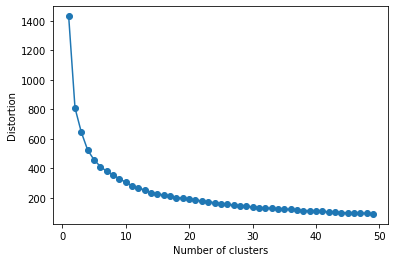

In [33]:
# Plot Distortions using Elbow method
distortions = []
maxK = 50
for i in range(1, maxK):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(scaled)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, maxK), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [34]:
# Try 10 clusters
kVal = 6
km = KMeans(
        n_clusters=kVal, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
km.fit(scaled)

KMeans(init='random', n_clusters=6, random_state=0)

In [35]:
clusterLabel = list(km.labels_)

In [36]:
kenPom['cluster'] = clusterLabel
kenPom['Team'] = teamName

In [37]:
kenPom.head()

Rk       Team Conf   W-L  AdjEM   AdjO  AdjO.1  AdjD  AdjD.1  AdjT  ...  \
0   1    Gonzaga  WCC  14-2  31.64  123.7       2  92.0      16  74.3  ...   
1   2     Baylor  B12  16-2  28.45  119.2       5  90.8      12  68.6  ...   
2   3   Kentucky  SEC  15-3  27.19  119.5       4  92.3      19  69.6  ...   
3   4     Purdue  B10  15-2  27.04  124.3       1  97.3      69  68.0  ...   
4   5  Villanova   BE  13-5  26.77  117.3       9  90.6      11  61.6  ...   

   Luck.1  AdjEM.1  AdjEM.1.1   OppO  OppO.1   OppD  OppD.1  AdjEM.2  \
0     287     0.01        177  102.7     200  102.7     169    -1.85   
1     196     4.87         55  103.8     136   98.9      20    -3.57   
2     302     0.90        149  102.6     206  101.7     107    -4.80   
3     154     4.29         62  106.3      32  102.0     121    -1.68   
4     217    11.72          2  109.5       2   97.8       5     9.12   

   AdjEM.1.2  cluster  
0        230        1  
1        285        1  
2        309        1  
3        225        1  
4         15        3  

[5 rows x 22 columns]

In [38]:
kenPom['cluster'].value_counts()

0    76
4    75
5    71
3    69
2    39
1    28
Name: cluster, dtype: int64

In [39]:
# Investigate clusters
clusterList = []
EMList = []
Offense = []
Defense = []
Tempo = []

for clusterNum in list(np.unique(kenPom['cluster'])):
    clusterSub = kenPom[kenPom['cluster'] == clusterNum].copy()
    clusterList.append(clusterNum)
    Offense.append(clusterSub['AdjO'].mean())
    Defense.append(clusterSub['AdjD'].mean())
    Tempo.append(clusterSub['AdjT'].mean())
    EMList.append(clusterSub['AdjEM'].mean())
    print('**********')
    print('Cluster Number: %d' %clusterNum)
    print(clusterSub['Team'].head(10))

clusterDF = pd.DataFrame({"clusterID": clusterList,
                          "EM": EMList,
                          "Offense": Offense,
                          "Defense": Defense,
                          "Tempo": Tempo})
    

**********
Cluster Number: 0
118          Mississippi
122     Jacksonville St.
123          Utah Valley
125               Temple
126         George Mason
127    Southern Illinois
128               Butler
131                Tulsa
134         Morehead St.
138                 Navy
Name: Team, dtype: object
**********
Cluster Number: 1
0      Gonzaga
1       Baylor
2     Kentucky
3       Purdue
5       Auburn
6      Houston
7       Kansas
8      Arizona
9          LSU
10        Duke
Name: Team, dtype: object
**********
Cluster Number: 2
285               Radford
286          Sacred Heart
289          San Jose St.
291               Stetson
294      Mount St. Mary's
296        Sacramento St.
297    Cal St. Northridge
301         North Florida
303     Northern Illinois
305                Denver
Name: Team, dtype: object
**********
Cluster Number: 3
4          Villanova
13        Texas Tech
16             Texas
18       Connecticut
19    Loyola Chicago
22          Ohio St.
24         Wisconsin

In [40]:
clusterDF.head(10)

clusterID         EM     Offense     Defense      Tempo
0          0  -2.917500  100.550000  103.464474  65.818421
1          1  20.864643  114.232143   93.367857  70.271429
2          2 -16.332308   93.764103  110.087179  66.815385
3          3  12.592029  109.008696   96.417391  66.402899
4          4   1.950000  105.120000  103.166667  69.682667
5          5 -10.431268   97.871831  108.307042  70.629577

In [41]:
# Scale the data
clusterIDs = clusterDF['clusterID'].copy()
del clusterDF['clusterID']
scalerDF = StandardScaler()
scalerDF.fit(clusterDF)
scaled = scalerDF.transform(clusterDF)
scaled = pd.DataFrame(scaled)
#scaled.columns=clusterCols
scaled.columns = clusterDF.columns
scaled.head()


EM   Offense   Defense     Tempo
0 -0.303524 -0.418334  0.167152 -1.247283
1  1.560859  1.572893 -1.527228  1.018203
2 -1.355168 -1.405918  1.278552 -0.740074
3  0.912334  0.812700 -1.015466 -0.949928
4  0.078060  0.246760  0.117175  0.718668

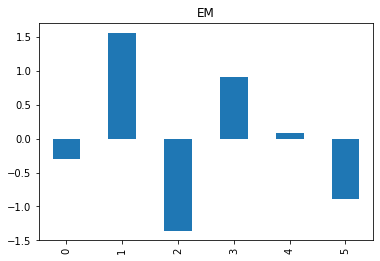

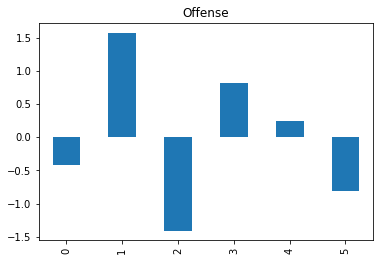

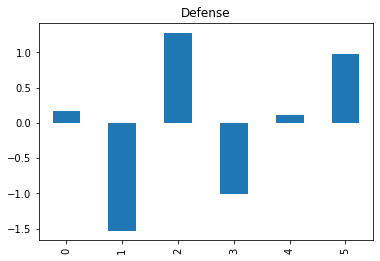

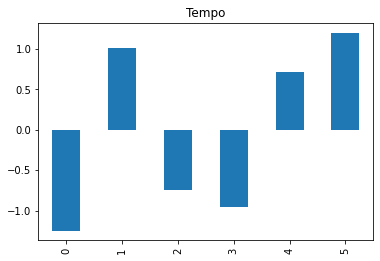

In [42]:
for col in list(scaled.columns):
    scaled[col].plot(kind='bar', xticks=list(clusterIDs), title=col)
    plt.show()

In [43]:
# Output Scaler
modelDir = base_path + '/models/'
pickle.dump(scaler, open(modelDir +'KPscaler.pkl','wb'))

In [44]:
# Output KMeans
pickle.dump(km, open(modelDir +'KMeans.pkl','wb'))

In [45]:
colsDF = pd.DataFrame({'orderedCols': clusterCols})
colsDF

orderedCols
0       AdjEM
1        AdjO
2        AdjD
3        AdjT

In [46]:
colsDF.to_csv(modelDir + 'clusterCols.csv', index=False)